In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import wavfile
import os
import glob

In [2]:
training_classes = glob.glob('../../data/exploration/Training/*//')
training_classes

['../../data/exploration/Training\\sax\\',
 '../../data/exploration/Training\\vio\\']

In [3]:
sax_training_files = glob.glob(training_classes[0] + '*.wav')
vio_training_files = glob.glob(training_classes[1] + '*.wav')

In [4]:
sax_training_files, vio_training_files

(['../../data/exploration/Training\\sax\\118__[sax][nod][jaz_blu]1702__3.wav'],
 ['../../data/exploration/Training\\vio\\001__[vio][nod][cou_fol]2194__1.wav',
  '../../data/exploration/Training\\vio\\134__[vio][nod][cla]2156__3.wav'])

## Sax

In [5]:
sax_file = sax_training_files[0]
fs, sax_file_data = wavfile.read(sax_file)

In [6]:
sax_file_data.dtype

dtype('int16')

In [7]:
np.max((sax_file_data + (2**15))/ (2**16))

0.837860107421875

In [8]:
norm_sax_file_dat = sax_file_data/(2. ** 15)

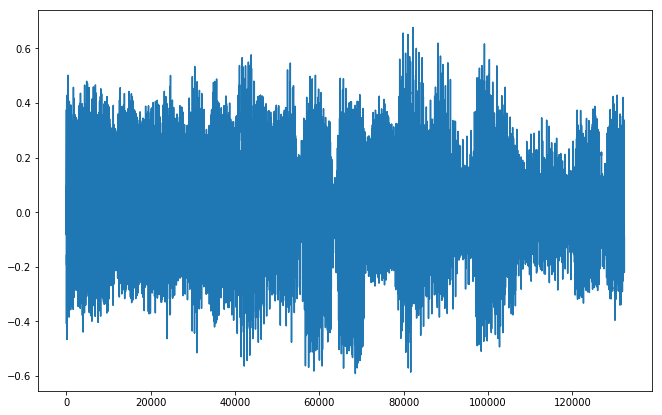

In [9]:
plt.figure(figsize=(11, 7))
plt.plot(norm_sax_file_dat[:, 0])

## Violin

In [10]:
vio_file = vio_training_files[0]
fs, vio_file_data = wavfile.read(vio_file)

In [11]:
vio_file_data.dtype

dtype('int16')

In [12]:
np.max((vio_file_data + (2**15))/ (2**16))

0.814666748046875

In [13]:
norm_vio_file_dat = vio_file_data/(2. ** 15)

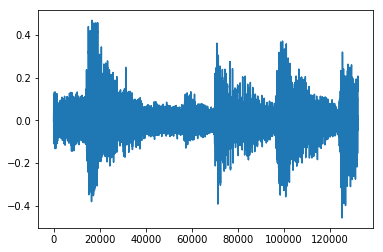

In [14]:
plt.plot(norm_vio_file_dat[:, 0])

In [15]:
vio_file = vio_training_files[-1]
fs, vio_file_data = wavfile.read(vio_file)

In [16]:
vio_file_data.dtype

dtype('int16')

In [17]:
norm_vio_file_dat = vio_file_data/(2. ** 15)

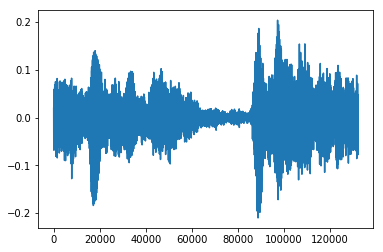

In [18]:
plt.plot(norm_vio_file_dat[:, 0])

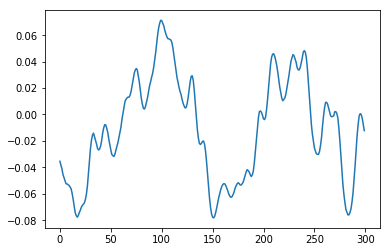

In [22]:
plt.plot(norm_vio_file_dat[:, 0][-300:])

## Number of Features

In [23]:
norm_vio_file_dat[:, 0].shape

(132299,)

In [24]:
norm_sax_file_dat[:, 0].shape

(132299,)

In [25]:
132299 ** 0.5

363.7292949433686

In [26]:
132299 - (363 ** 2)

530

In [27]:
image.shape

NameError: name 'image' is not defined

In [ ]:
fig = plt.figure(figsize=(7, 7))
chan = norm_vio_file_dat[:, 0][:(363**2)].reshape(363, 363) * 255
image = np.zeros((363, 363, 3))
image[:, :, 0] = chan
image[:, :, 1] = chan
image[:, :, 2] = chan
#image = image.reshape(363, 363, 3)
plt.imshow(image + 1)

In [28]:
image = image.reshape(363, 363, 3)

NameError: name 'image' is not defined

In [29]:
image.shape

NameError: name 'image' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


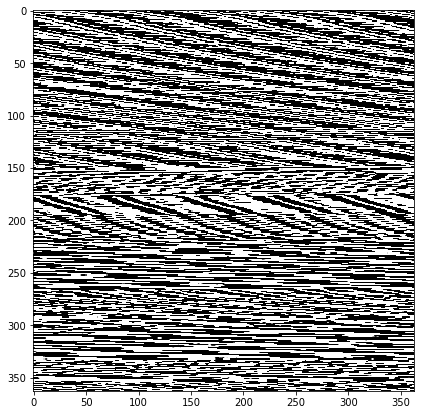

In [30]:
fig = plt.figure(figsize=(7, 7))
chan = norm_sax_file_dat[:, 0][:(363**2)].reshape(363, 363) * 255
image = np.zeros((363, 363, 3))
image[:, :, 0] = chan
image[:, :, 1] = chan
image[:, :, 2] = chan
#image = image.reshape(363, 363, 3)
plt.imshow(image + 1)

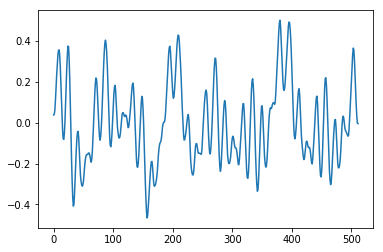

In [38]:
my_arr = norm_sax_file_dat[:2**9, 0]
plt.plot(my_arr)

In [34]:
x = np.array([my_arr]*(2**9))

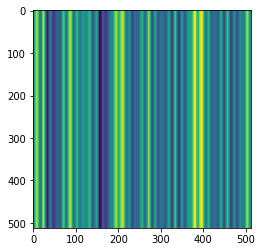

In [37]:
import matplotlib.pyplot as plt
plt.imshow(x)

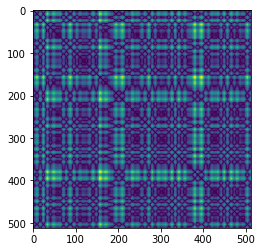

In [36]:
plt.imshow(np.abs((x.T - x)*255))

In [ ]:
my_arr = norm_vio_file_dat[:2**9, 0]

In [ ]:
x = np.array([my_arr]*(2**9))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(np.abs((x.T - x)*255))

In [ ]:
x = norm_sax_file_dat[:, 0]

In [ ]:
2**17

In [ ]:
x = x[:2**17]

In [ ]:
import tensorflow as tf

In [ ]:
my_tensor = tf.nn.max_pool(x.reshape(1, 1, 1, 2**17), [1, 1, 1, 2**9], [1, 1, 1, 2**9], padding='VALID')

In [ ]:
a = my_tensor[0, 0, 0, :]

In [ ]:
a.shape[0].value

In [ ]:
b = tf.stack([a]*256)

In [ ]:
z = tf.transpose(b) - b

In [ ]:
y = tf.nn.max_pool(tf.reshape(z, (1, 256, 256, 1)), (1, 8, 8, 1), (1, 8, 8, 1), padding='VALID')

In [ ]:
sess = tf.Session()
with sess.as_default():
    im = (tf.reshape(y, (32, 32)).eval())

In [ ]:
plt.imshow(im)

In [ ]:
im = np.array([new_arr[0, 0, 0, :]]*256)

In [ ]:
plt.imshow(np.abs(im.T - im) * 255)

In [ ]:
rp = np.abs(im.T - im)
plt.imshow(rp)
rp_tensor = tf.nn.max_pool(rp.reshape(1, 256, 256, 1), [1, 8, 8, 1], [1, 8, 8, 1], padding='VALID')

In [ ]:
sess = tf.Session()
with sess.as_default():
    rp_arr = rp_tensor.eval()

In [ ]:
rp_arr.shape

In [ ]:
plt.imshow(rp_arr[0, :, :, 0])

In [ ]:
import PIL

In [ ]:
PIL.Image.open(f'C:\Users\Saksham Goel\Desktop\Machine Learning\Git Repositories\organphile\data\mrp_jpg\vio\')

# Human Voice

In [2]:
freq, data = wavfile.read('../../data/whole_dataset/training/vio/174__[vio][nod][cla]2157__1.wav')

In [3]:
data

array([[1021, 1046],
       [1153, 1182],
       [1232, 1281],
       ...,
       [-507, -478],
       [-367, -342],
       [-373, -340]], dtype=int16)

In [ ]:
plt.plot(data[:, 0])

In [ ]:
plt.plot(data[:, 1])

# FFT

In [ ]:
t = np.arange(256)
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])

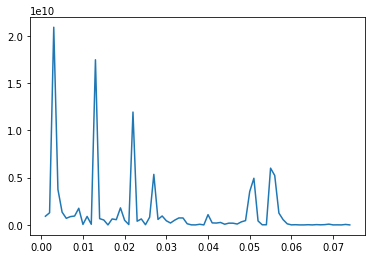

In [12]:
#### x = data[:1000, 1]
sp = np.fft.fft(x)
freq = np.fft.fftfreq(x.shape[-1])
plt.plot(figsize=(15, 5))
plt.plot(freq[(freq > 0) & (freq < 0.075)], sp.real[(freq > 0) & (freq < 0.075)]**2)#, freq, sp.imag)
#plt.plot(sp.real)

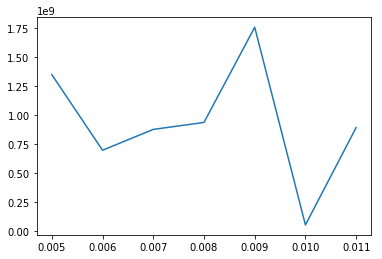

In [10]:
#### x = data[:1000, 1]
sp = np.fft.fft(x)
freq = np.fft.fftfreq(x.shape[-1])
plt.plot(figsize=(15, 5))
plt.plot(freq[(freq > 0.004) & (freq < 0.012)], sp.real[(freq > 0.004) & (freq < 0.012)]**2)#, freq, sp.imag)
#plt.plot(sp.real)

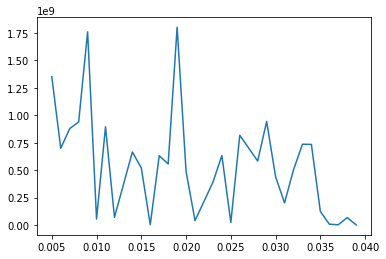

In [19]:
#### x = data[:1000, 1]
sp = np.fft.fft(x)
freq = np.fft.fftfreq(x.shape[-1])
plt.plot(figsize=(15, 5))
plt.plot(freq[(freq > 0.004) & (freq < 0.04) & (sp.real**2 < 0.5 * (10**10))], sp.real[(freq > 0.004) & (freq < 0.04) & (sp.real**2 < 0.5 * (10**10))]**2)#, freq, sp.imag)
#plt.plot(sp.real)

In [ ]:
t = np.arange(256)
>>> sp = np.fft.fft(np.sin(t))
>>> freq = np.fft.fftfreq(t.shape[-1])
>>> plt.plot(freq, sp.real)#, freq, sp.imag)

In [ ]:
t = np.arange(0, 10, 0.01)
dat = np.sin(t)
axi = np.array([dat] * len(dat))
plt.imshow(axi.T - axi)

In [ ]:
plt.plot(dat)